<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Outlier_Removal_Using_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Removal Using Z-Score :-

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('placement_new.csv')

In [26]:
df.shape

(1000, 3)

In [27]:
df.sample(5)

,cgpa,placement_exam_marks,placed
824,7.48,27.0,1
506,7.84,8.0,1
329,7.30,35.0,0
245,6.78,62.0,0
713,7.80,24.0,0


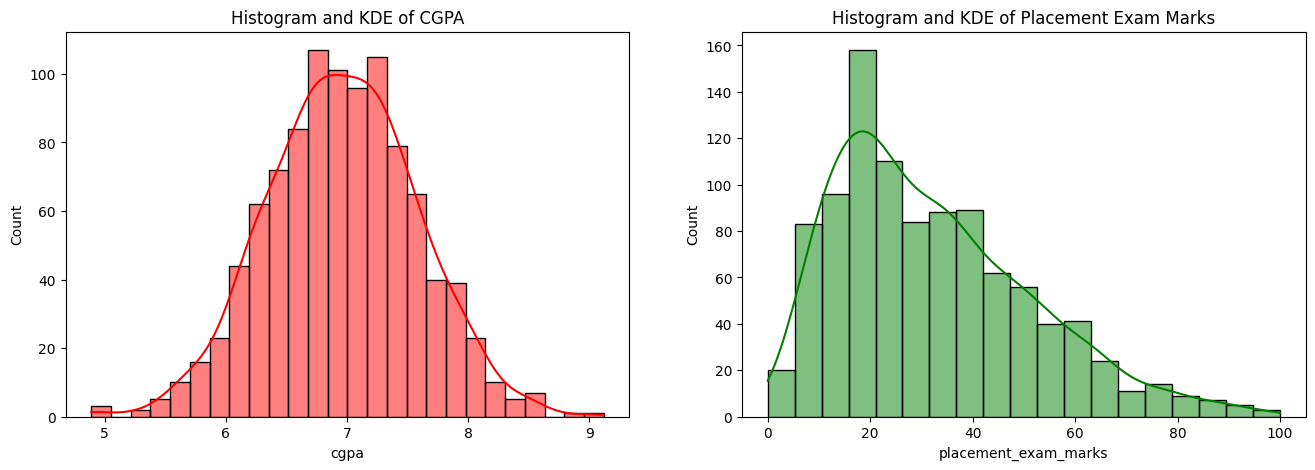

In [28]:
plt.figure(figsize=(16,5))

# Plot for CGPA
plt.subplot(1,2,1)
sns.histplot(data=df, x='cgpa', kde=True, color='red')
plt.title('Histogram and KDE of CGPA')

# Plot for Placement Exam Marks
plt.subplot(1,2,2)
sns.histplot(data=df, x='placement_exam_marks', kde=True, color='green')
plt.title('Histogram and KDE of Placement Exam Marks')

plt.show()

###We can not apply z-score in placement_exam_marks column since it is not normally distributed..

In [29]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [30]:
df['cgpa'].skew()

-0.014529938929314918

In [31]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


## Finding the boundary values :-

In [32]:
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


## Finding the outliers :-

In [33]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#Trimming :-

###Approach 1:-

In [34]:
#Trimming :
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach 2:-

In [35]:
# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [36]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
537,7.13,9.0,1,0.274006
736,6.86,24.0,1,-0.164378
692,6.95,43.0,0,-0.018250
419,6.22,46.0,0,-1.203511
460,6.91,4.0,1,-0.083196


In [37]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [38]:
df[df['cgpa_zscore'] <-3 ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [39]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [40]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [41]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


#Capping :-

In [43]:
df=pd.read_csv('placement_new.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
84,5.65,35.0,1
524,6.85,21.0,0
512,7.08,9.0,1
628,7.12,9.0,0
513,6.43,46.0,0


In [44]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [45]:
print("upper limit : ",upper_limit)
print("lower limit :",lower_limit)

upper limit :  8.808933625397168
lower limit : 5.113546374602832


In [46]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [47]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [48]:
df.shape

(1000, 3)

In [49]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64